# Customer Segmentation Based on Purchasing Behavior
In this notebook, we will segment customers based on their purchasing behaviors using three different clustering algorithms: k-means, hierarchical, and gaussianMixture. This is an unsupervised problem as there is no target variable in the dataset, and the aim here is to discover patterns in customers spendings and subgroups them. 




## Dataset Description

We will be using a [dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) from the UCI Machine Learning repository. The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. Here are the features included in the dataset:  

* FRESH: annual spending (m.u.) on fresh products (Continuous).
* MILK: annual spending (m.u.) on milk products (Continuous).
* GROCERY: annual spending (m.u.)on grocery products (Continuous).
* FROZEN: annual spending (m.u.)on frozen products (Continuous).
* DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper product(Continuous).
* DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous).
* CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal).
* REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal).


## Loading the Data 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('Wholesale customers data.csv')
# droping these features as they are not categories and will not be healpful for our analysis 
data.drop(['Region', 'Channel'], axis=1, inplace=True)

## Exploring the Data 

In [ ]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [ ]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


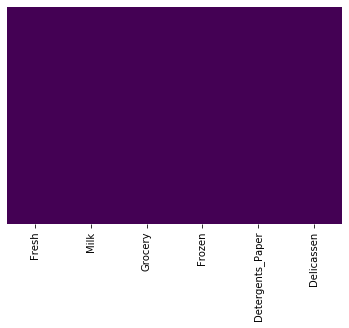

In [ ]:
# checking missing values 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* There are 440 rows and 6 columns. 
* All features are numerical. 
* The dataset doesn't have any missing values. 

### Visualizing Feature Distributions
To get a better understanding of the features and how they're related, we'll use a scatter matrix and heatmap of the six spending categories. Specifically, we're interested in the distribution of values for a given feature (left diagonal) and the correlation between features.




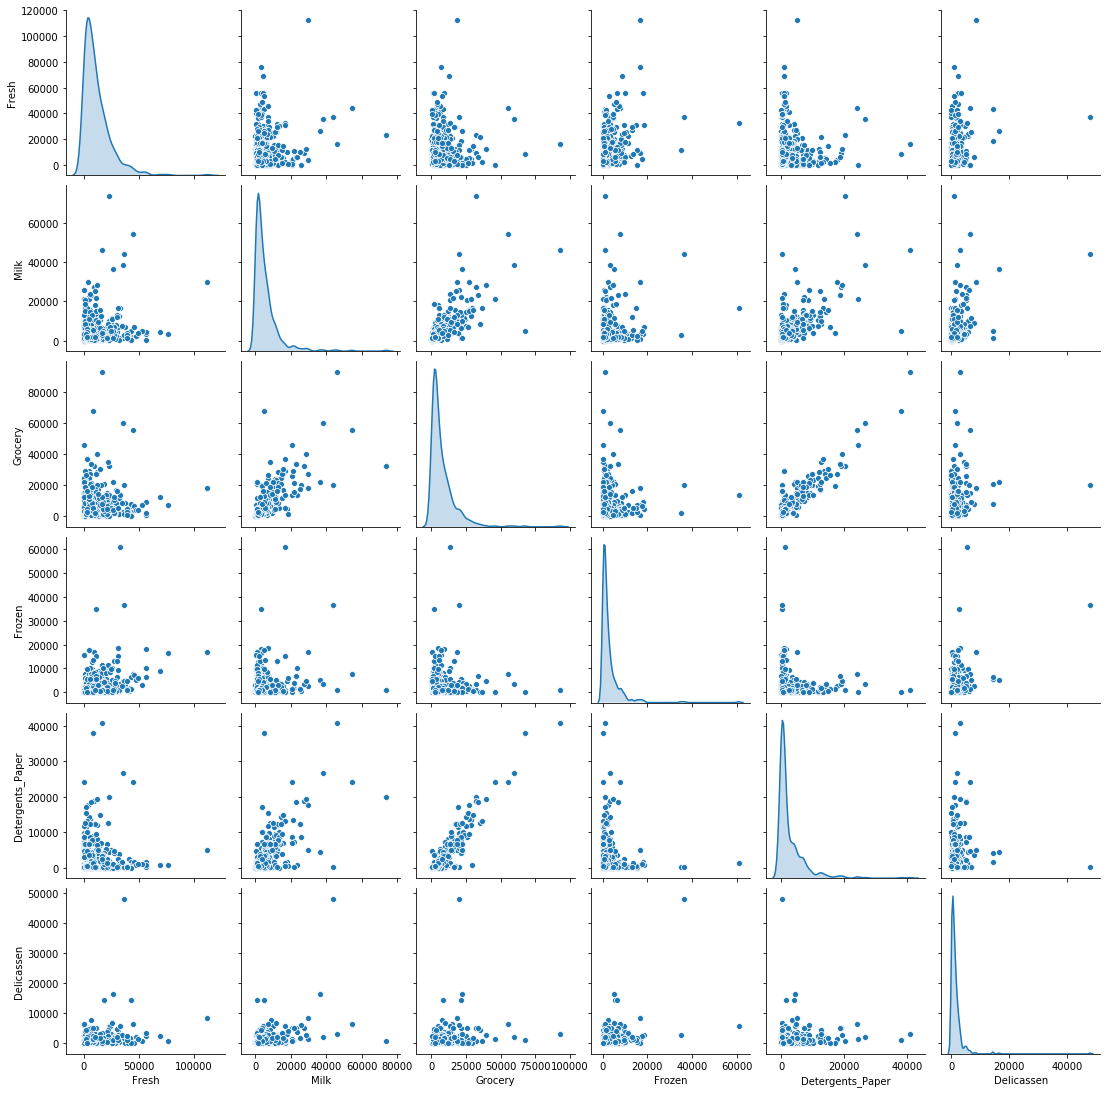

In [ ]:
# Produce a scatter matrix for each pair of features in the data
sns.pairplot(data, diag_kind='kde' )

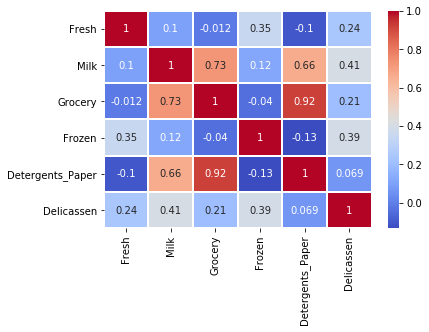

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

* Data is not normally distributed, it is postively skewed. 
* Some data points shows little correlation between them. 
* From the scatter plots and the heatmap, we can see there is a strong correlation between the 'Grocery' and 'Detergents_Paper' and moderate correlation between 'Grocery' and 'Milk.
* This confirms the relevance of the 'Grocery' feature, which can be predicted with the 'Detergents_Paper' feature. So, it is not a necessary feature in the dataset. 

## Data Preprocessing
Here, wer will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.




### Feature Scaling 
As we saw earlier in the scatter plot matrix, the data is not normally distributed, the mean and median vary significantly (indicating a large skew). So, it is most often appropriate to apply a non-linear scaling. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

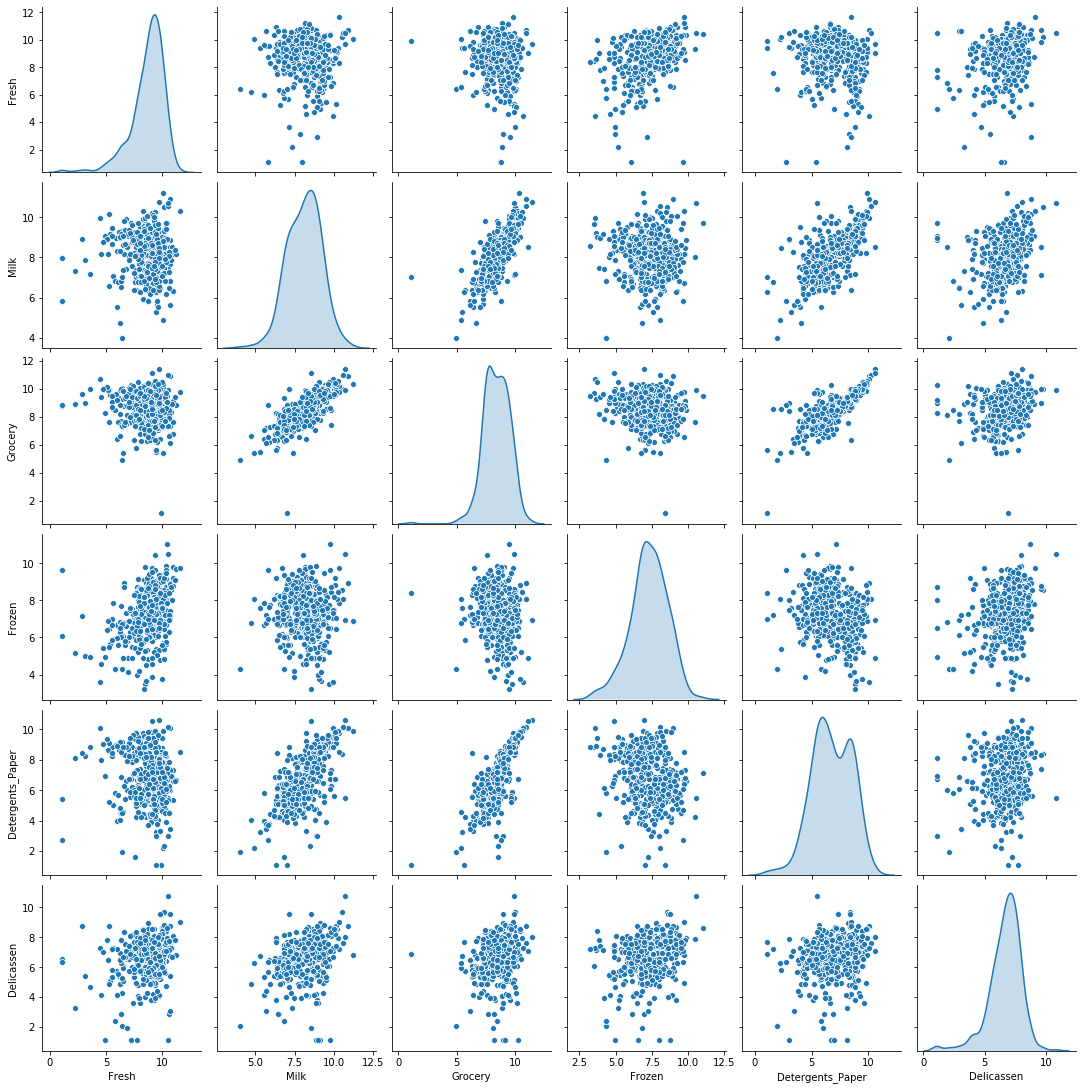

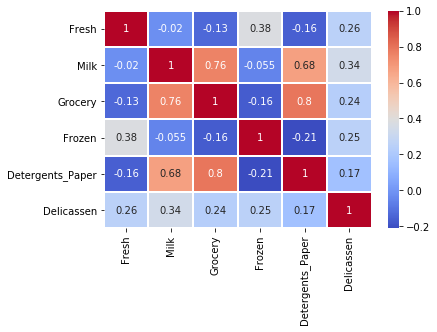

In [ ]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, diag_kind='kde' )

#check correlation again 
plt.figure(figsize=(6,4))
sns.heatmap(log_data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

In [ ]:
log_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


* After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal. 
* For any pairs of features we have identified earlier as being correlated, we observe here that correlation is still present.

### Outlier Detection - Turkey's Method 
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we'll use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

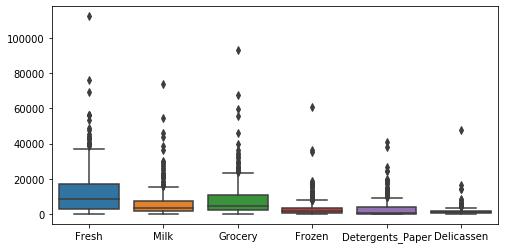

In [ ]:
# checking boxplot before and after the transformation 
plt.figure(figsize=(8,4))
sns.boxplot(data=data)

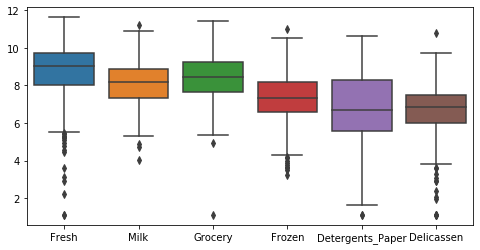

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=log_data)

In [ ]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [ ]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [ ]:
# Finding the indexes of outliers existed in more than one features 
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 75, 128, 154]

In [ ]:
# Removing outliers
good_data = log_data.drop(dupes, axis=0).reset_index(drop=True)

In [ ]:
# Examining whether or not removing outliers affected the mean or variance in the data
display(log_data.describe())
display(good_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


* Datapoints considered outliers that are present in more than one feature are: 65, 66, 75, 128, 154.
* K-Means is heavily influenced by the presence of outliers as they increase significantly the loss function that the algorithm tries to minimize. This loss function is the squared sum of the distances of each datapoint to the centroid, so, if the outlier is far enough, the centroid will be incorrectly situated. Because of this, the outliers shoul be removed.

In [ ]:
# good_data = good_data.drop(['Grocery'], axis = 1)
good_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
430,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
431,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
432,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
433,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


### Outlier Detection - Normal Standard Deviation Method

In [ ]:
import statistics as st
data = log_data['Grocery']
anomalies = []

def findAnomalies(data):
  stdev = st.stdev(data)
  mean = st.mean(data)
  cut_off = stdev * 3
    
  lower_limit  = mean - cut_off 
  upper_limit  = mean + cut_off
  # Generate outliers
  for outlier in data:
      if outlier > upper_limit or outlier < lower_limit:
        anomalies.append(outlier)
  return anomalies

print(findAnomalies(data))

[1.0986122886681098, 4.919980925828125]


In [ ]:
index = []
for element in log_data['Grocery']:
  element

### Outlier Detection - Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')
pred = iso_forest.fit_predict(log_data)
print(pred)
result = np.where(pred == -1)
print('Tuple of arrays returned : ', result) 

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1 -1
  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1
 -1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1

In [ ]:
log_data.loc[(result[0]),:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
39,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
42,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
43,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
...,...,...,...,...,...,...
412,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [ ]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [ ]:
# apply feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(good_data)

In [ ]:
scaled_data = pd.DataFrame(scaled_data, columns=good_data.columns)
scaled_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02
mean,-1.544103e-16,-1.388417e-16,6.097294e-16,-7.595457e-16,5.480929e-16,-2.899341e-16
std,1.001151e+00,1.001151e+00,1.001151e+00,1.001151e+00,1.001151e+00,1.001151e+00
min,-5.394358e+00,-3.211749e+00,-2.943561e+00,-3.259578e+00,-3.387800e+00,-4.442416e+00
25%,-4.877127e-01,-7.192004e-01,-7.505242e-01,-5.379314e-01,-7.359890e-01,-5.355129e-01
50%,2.031443e-01,6.566289e-02,6.829729e-03,1.237354e-02,-5.840698e-02,1.427815e-01
75%,6.826875e-01,7.054836e-01,7.795273e-01,6.770228e-01,8.787678e-01,6.472293e-01
max,2.012620e+00,2.897873e+00,2.849782e+00,2.931020e+00,2.269128e+00,3.241798e+00


In [ ]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(scaled_data)

In [ ]:
pca.explained_variance_ratio_

array([0.44119638, 0.25954467])

In [ ]:
pca.components_

array([[ 1.06059856e-01, -5.44013060e-01, -5.73181911e-01,
         1.45138021e-01, -5.46252188e-01, -2.11676868e-01],
       [-5.87613687e-01, -1.37006288e-01, -2.95806830e-04,
        -5.94373864e-01,  6.90183755e-02, -5.27157963e-01]])

In [ ]:
pca2 = pca.transform(scaled_data)

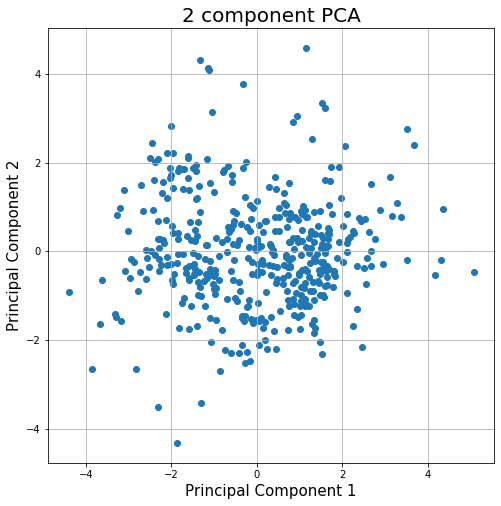

In [ ]:
# Another form to visualize the data
principalDf = pd.DataFrame(data = pca2, columns = ['principal component 1', 'principal component 2'])

#visualize the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1']
            , principalDf['principal component 2'])

ax.grid()

## Machine Learning Models
In this section, we will implement three different clustering algorithms including K-means, Hierarchical, and GaussianMixture. 

### K - Means Clustering

Text(0, 0.5, 'WCSS')

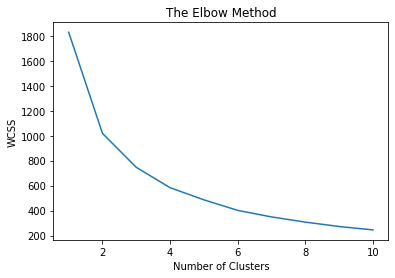

In [ ]:
#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    cluster = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300)
    cluster.fit(pca2)
    wcss.append(cluster.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

As we can see from the elbow method graph, two is the optimal number of clusters. 

In [ ]:
cluster = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300)
y_knn = cluster.fit_predict(pca2)
print(cluster.cluster_centers_)
y_knn

[[ 1.14952692 -0.13804889]
 [-1.59796874  0.19190312]]


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(pca2, y_knn)
print(ss)

0.41670837939256233


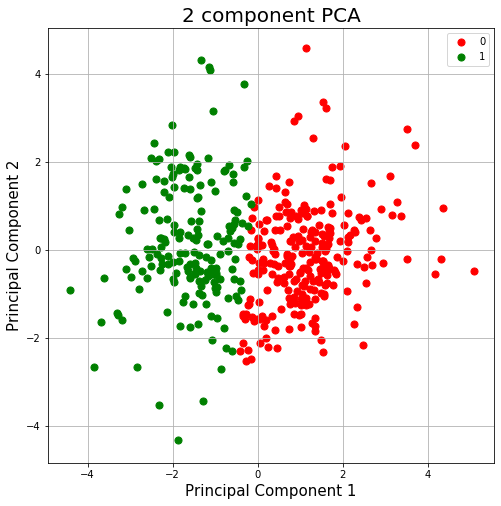

In [ ]:
# Visualize the data after the PCA transformation
principalDf = pd.DataFrame(data = pca2, columns = ['principal component 1', 'principal component 2'])
targetDf = pd.DataFrame(data = y_knn, columns = ['target'])
finalDf = pd.concat([principalDf, targetDf], axis = 1)
#visualize the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']

for target,color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

### Hierarchical Clustering

<Figure size 1080x1080 with 0 Axes>

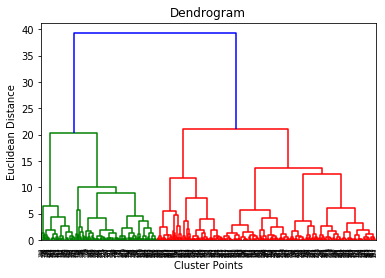

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# To find the number of the optimal clusters 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pca2, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Cluster Points")
plt.ylabel("Euclidean Distance")
plt.figure(figsize = (15,15))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_hierarchical = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hie = cluster_hierarchical.fit_predict(pca2)
print(cluster.cluster_centers_)
y_hie

[[ 1.14952692 -0.13804889]
 [-1.59796874  0.19190312]]


array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
ss_hie = silhouette_score(pca2, y_hie)
print(ss_hie)

0.4101999345690581


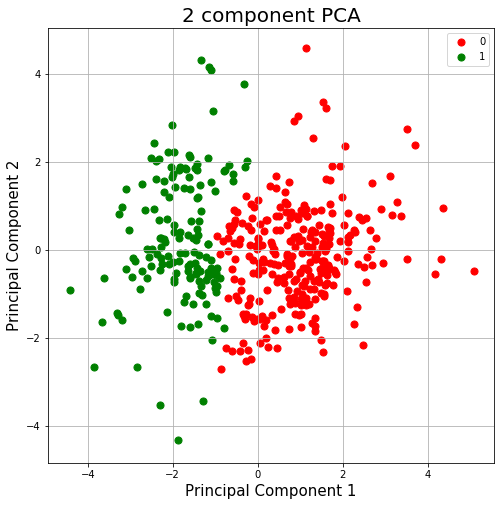

In [ ]:
# Visualize the data after the PCA transformation
principalDf = pd.DataFrame(data = pca2, columns = ['principal component 1', 'principal component 2'])
targetDf = pd.DataFrame(data = y_hie, columns = ['target'])
finalDf = pd.concat([principalDf, targetDf], axis = 1)
#visualize the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']

for target,color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

### GaussianMixture 

In [ ]:
from sklearn.mixture import GaussianMixture
clusterer = GaussianMixture(random_state=42, n_components=2)
y_clusterer = clusterer.fit(pca2)
y_gau = clusterer.predict(pca2)
y_clusterer.means_

array([[ 0.96543336, -0.23480367],
       [-1.53362772,  0.37299459]])

In [ ]:
ss_gau = silhouette_score(pca2, y_gau)
print(ss_gau)

0.4141359298308033


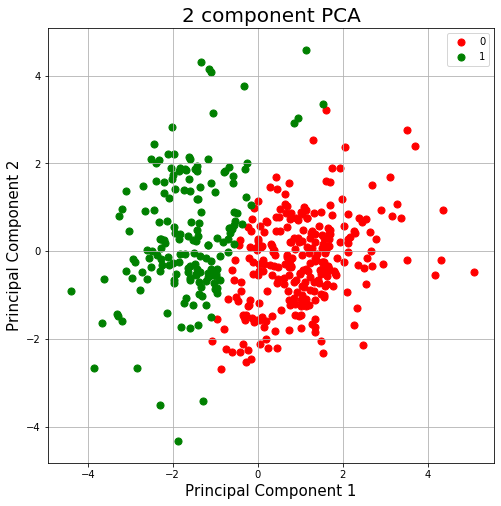

In [ ]:
# Visualize the data after the PCA transformation
principalDf = pd.DataFrame(data = pca2, columns = ['principal component 1', 'principal component 2'])
targetDf = pd.DataFrame(data = y_gau, columns = ['target'])
finalDf = pd.concat([principalDf, targetDf], axis = 1)
#visualize the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']

for target,color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

As we can see, the silhouette_score for the three algorithms is very close. 

### PCA Interpretation 

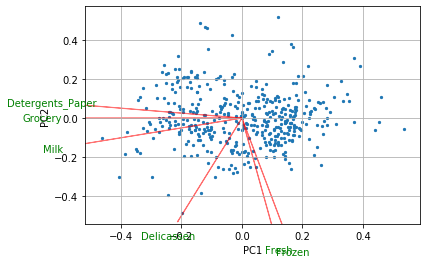

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca2,np.transpose(pca.components_), labels=good_data.columns)
plt.show()

## Conclusion

**Final Interpretation**

In [ ]:
The cluster of customers who belong to cluster zero(toward the right side of the graph) represents customers who spend higher amount on milk, grocery and detergent paper. However, the spending level on the other products such as delicassen, fresh and frozen is on average rate for customers in both clusters. 